In [133]:
import drawSvg as draw
from opensimplex import OpenSimplex
from math import pi, sin, cos

gen = OpenSimplex(seed=123)

In [211]:
def loop(n = 180, orad=200, irad=80, res = 100, skipfunc=lambda x: x % 6 == 0, 
         noise_ri=2, noise_ro=2, noise_coeff=8, lap=False, dumb_boost=1,boost=0,reverse=False, ends=True):
    canvas = draw.Drawing(600, 600, center=(0,0), displayInline=False)
    lines = []
    mid = (irad + orad) / 2 - irad
    mood = (irad + orad) / 2
    rev = 1 if not reverse else -1
    for i in range(n):
        theta = i * 2 * pi / n
        midx = mid * sin(rev * theta) + 400
        midy = mid * cos(rev * theta) + 400
        line = []
        noise_x, noise_y = noise_ri * cos(theta), noise_ri * sin(theta)
        for j in range(res):
            theta2 = j / res * pi + theta * dumb_boost
            theta3 = theta2
            if lap:
                theta3 = j/res*2*pi + theta
            theta3 += theta * boost
            noise_z, noise_w = noise_ro * cos(rev * theta3), noise_ro * sin(rev * theta3)
            noise = gen.noise4d(noise_x, noise_y, noise_z, noise_w)
            mod = mood + noise * noise_coeff
            offx = mod * sin(rev * theta2)
            offy = mod * cos(rev * theta2)
            line.append((midx + offx, midy + offy))
        lines.append(line)
    ring1 = []
    ring2 = []
    ring3 = []
    bonus = []
    derp = False
    for i,line in enumerate(lines):
        ring1.extend(line[0])
        ring2.extend(line[-1])
        if skipfunc(i):
            continue        
        if ring3:
            x, y= ring3[-2:]
            x2, y2 = line[0]
            if not derp:
                x2, y2 = line[-1]
            if ((x - x2)**2 + (y-y2)**2) > 60**2:
                bonus.append(ring3)
                ring3 = []
        if derp:
            for pair in line:
                ring3.extend(pair)
        else:
            for pair in line[::-1]:
                ring3.extend(pair)
            
        derp = not derp
    canvas.append(draw.Lines(*ring3, close=False, fill='none', stroke='black'))
    if ends:
        canvas.append(draw.Lines(*ring1, close=True, fill='none', stroke='black'))
        canvas.append(draw.Lines(*ring2, close=True, fill='none', stroke='black'))
    for line in bonus:
        canvas.append(draw.Lines(*line, close=False, fill='none', stroke='black'))
    print(len(bonus))
    canvas.setPixelScale(.7)
    display(canvas.rasterize())

51


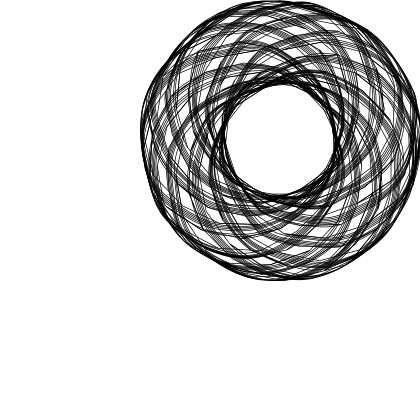

In [212]:
loop(n=180, dumb_boost=12, ends=True)

0


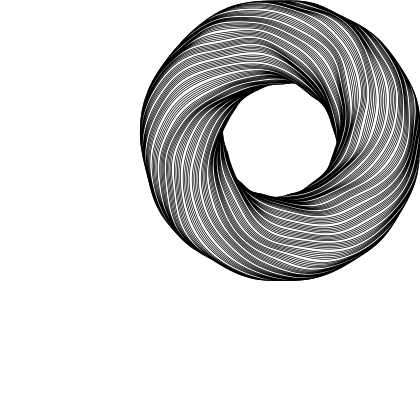

In [213]:
loop()

0


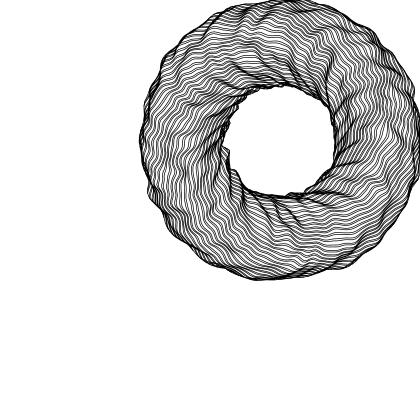

In [214]:
loop(noise_ri=2, noise_ro=8, noise_coeff=10, skipfunc=lambda x: x%3 == 0)

0


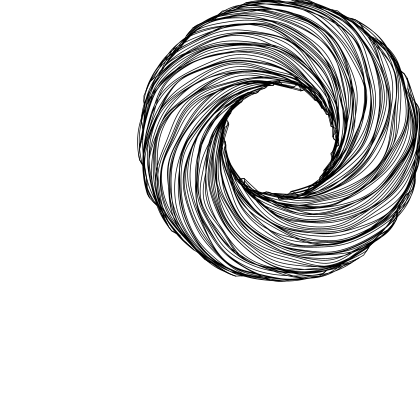

In [215]:
loop(noise_ri=10, noise_ro=2, noise_coeff=10)

0


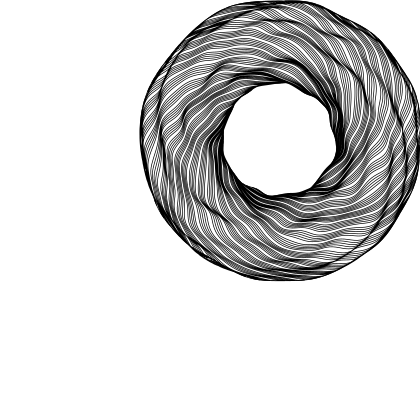

In [216]:
loop(noise_ri=2, noise_ro=2, noise_coeff=10, lap=True)

0


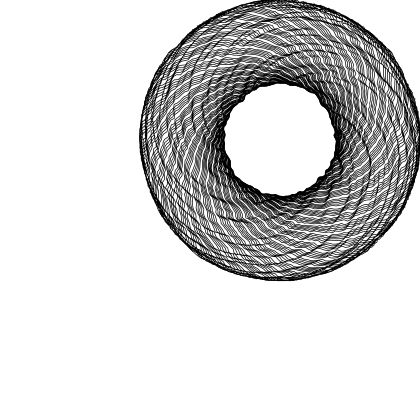

In [217]:
loop(noise_ri=2, noise_ro=10, noise_coeff=5, lap=True)

0


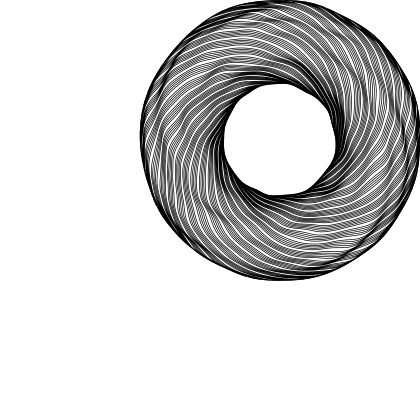

In [218]:
loop(noise_ri=2, noise_ro=2, noise_coeff=5, lap=True)

0


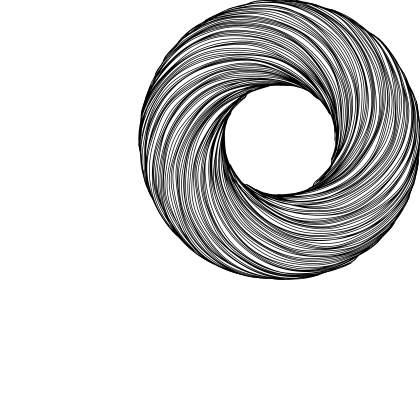

In [219]:
loop(noise_ri=10, noise_ro=1, noise_coeff=5, lap=True)

0


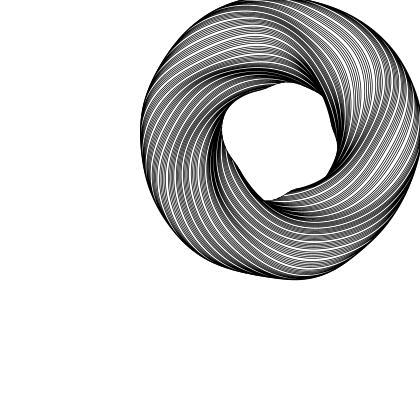

In [220]:
loop(noise_ri=1, noise_ro=1, noise_coeff=20)

0


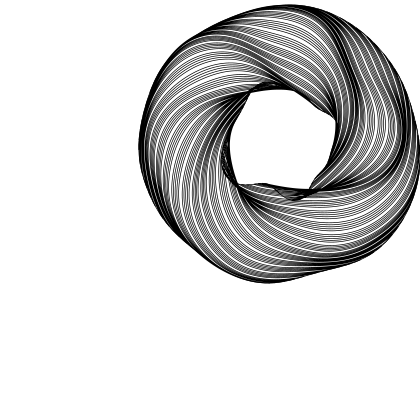

In [221]:
loop(noise_ri=1, noise_ro=1, noise_coeff=-30)

0


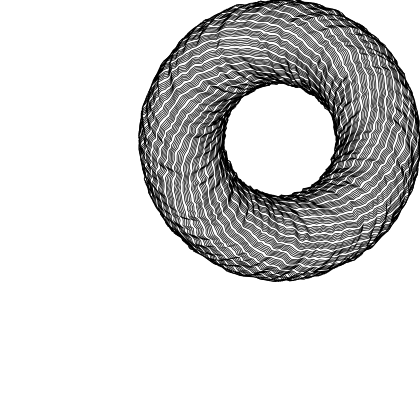

In [222]:
loop(noise_ri=2, noise_ro=20, noise_coeff=5, lap=False)

0


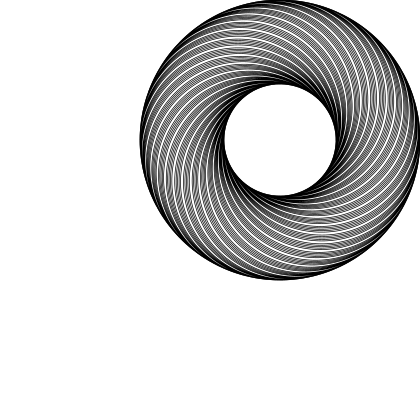

In [223]:
loop(noise_ri=2, noise_ro=20, noise_coeff=0, lap=False)

0


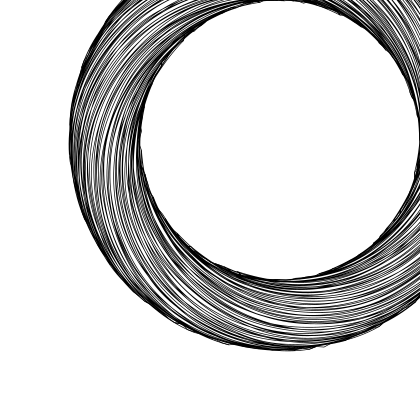

In [224]:
loop(orad=300, irad=200, noise_ri=100, noise_ro=1, noise_coeff=5, lap=True)

0


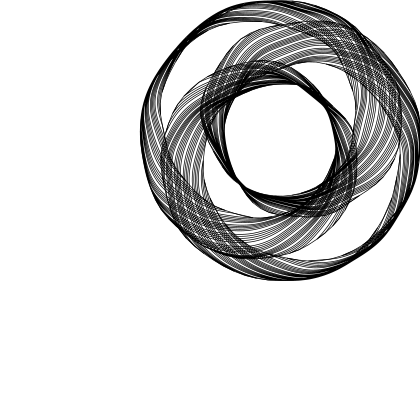

In [225]:
loop(dumb_boost=3)

0


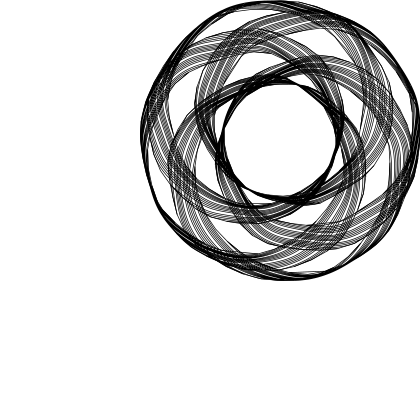

In [226]:
loop(dumb_boost=5)

14


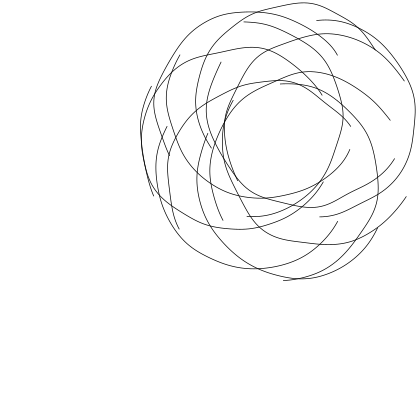

In [227]:
loop(n=18, dumb_boost=12, ends=False)

0


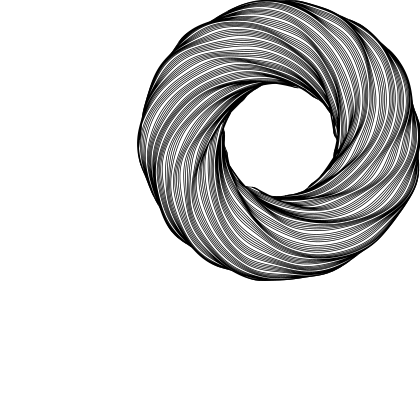

In [228]:
loop(boost=1)

0


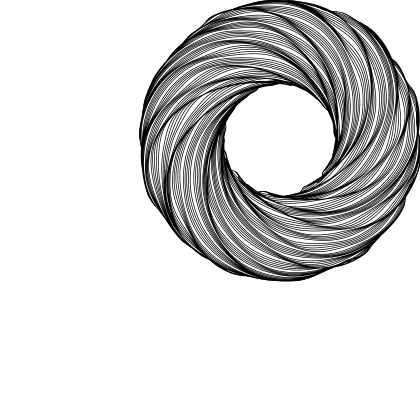

In [229]:
loop(boost=2)

0


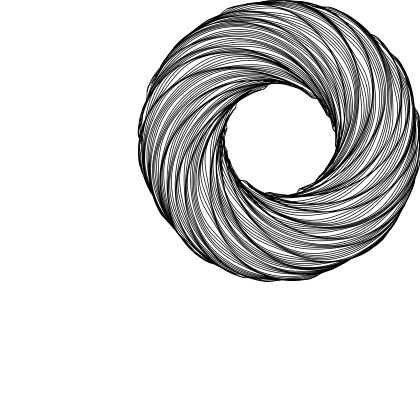

In [230]:
loop(boost=3)

0


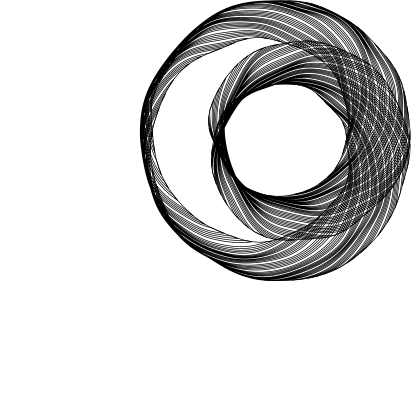

In [231]:
loop(dumb_boost=2)

0


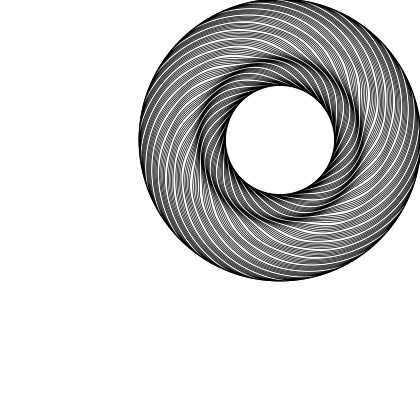

In [232]:
loop(noise_ri=0, boost=-1)

0


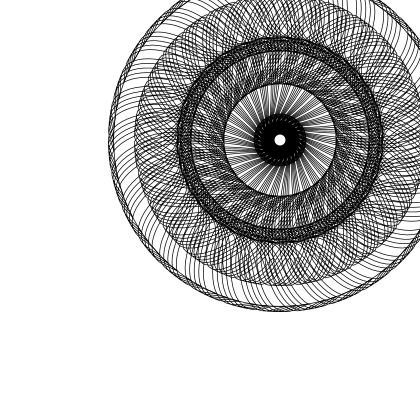

In [233]:
loop(noise_ri=0, boost=-1, noise_coeff=200)

0


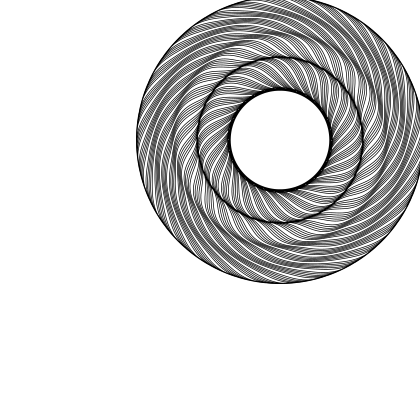

In [234]:
loop(noise_ri=0, boost=-1, noise_coeff=25)

0


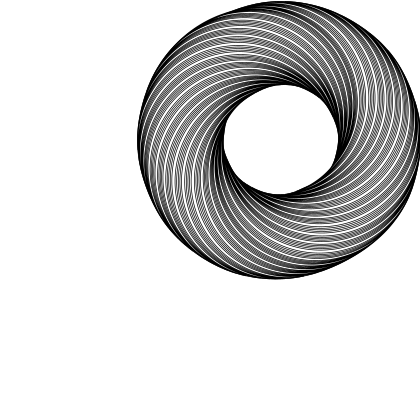

In [235]:
loop(noise_ro=0, boost=-1)

0


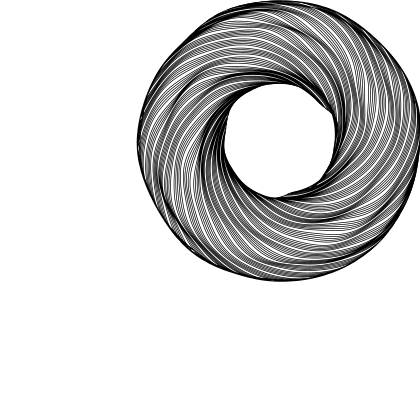

In [236]:
loop(boost=-1)

0


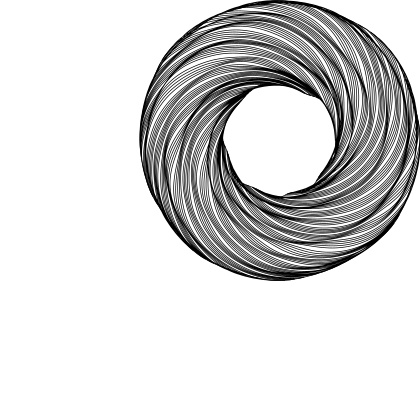

In [237]:
loop(boost=-2)

0


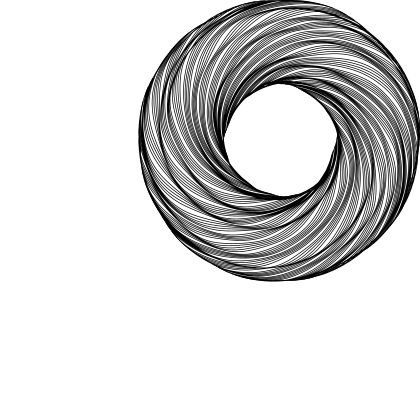

In [238]:
loop(reverse=True, boost=-2)

0


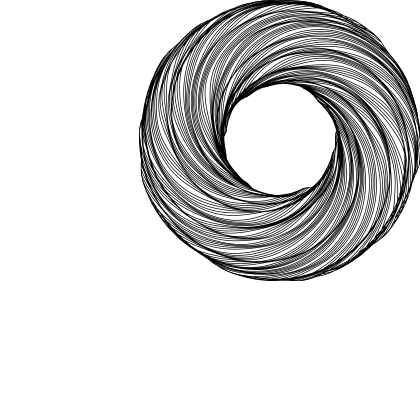

In [239]:
loop(reverse=True, boost=-3)

0


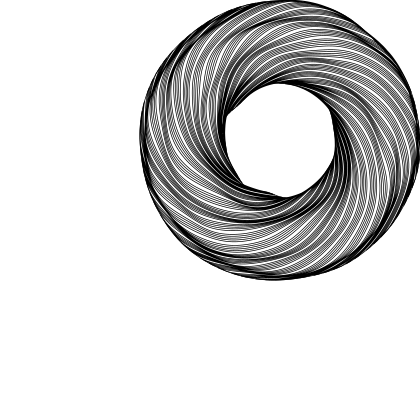

In [240]:
loop(reverse=True, boost=-1)

0


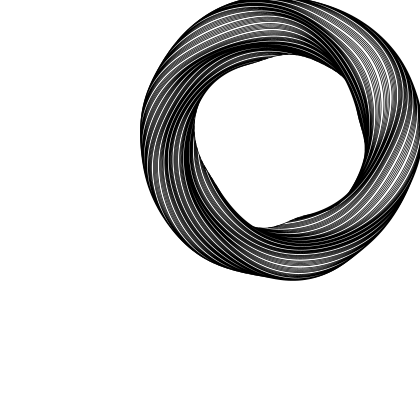

In [241]:
loop(irad=120, noise_ri=1, noise_ro=1, noise_coeff=20)

0


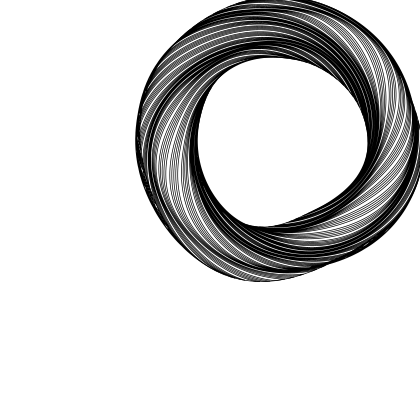

In [242]:
loop(irad=120, noise_ri=1, noise_ro=1, boost=-1, noise_coeff=20)

0


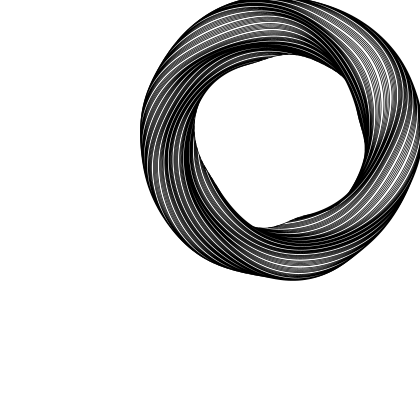

In [243]:
loop(irad=120, noise_ri=1, noise_ro=1, boost=0, noise_coeff=20)

0


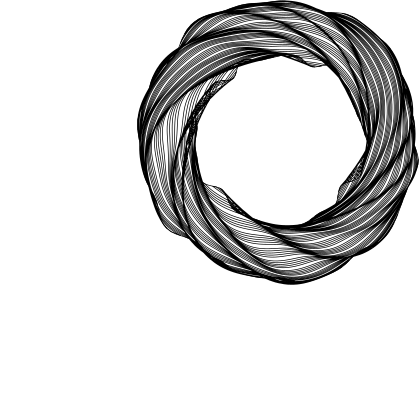

In [244]:
loop(irad=120, noise_ri=1, noise_ro=2, boost=1, noise_coeff=20)

0


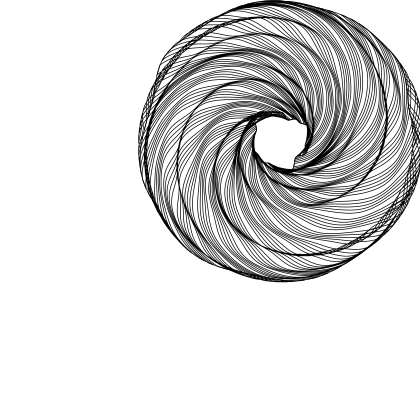

In [245]:
loop(irad=40, noise_ri=1, noise_ro=2, boost=-2, noise_coeff=20)

0


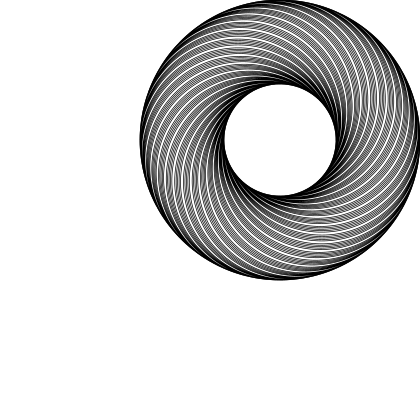

In [246]:
loop(noise_coeff=0)

0


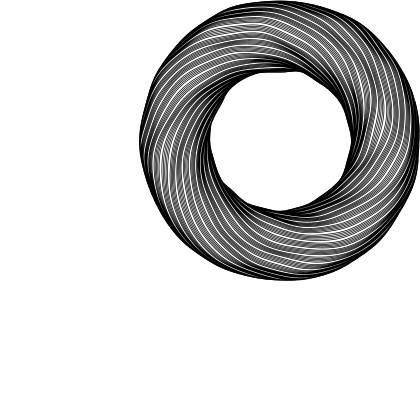

In [247]:
loop(irad=100,noise_ri=2, noise_ro=2.5, noise_coeff=5, lap=False)

0


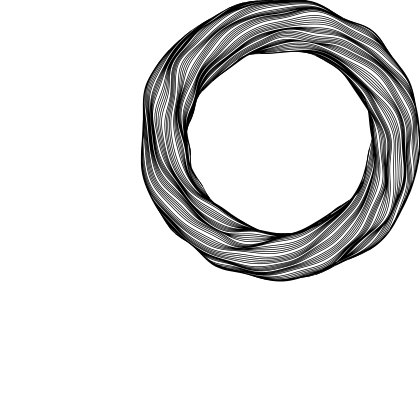

In [248]:
loop(n=120, irad=130, noise_ri=2, noise_ro=3, noise_coeff=10, reverse=True, lap=False)

0


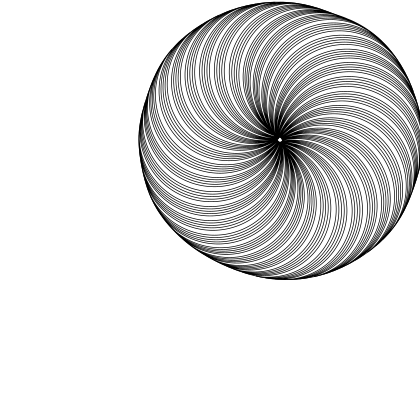

In [249]:
loop(n=180,irad=0,noise_ri=2, noise_ro=0.1, noise_coeff=10, reverse=True, lap=False)

0


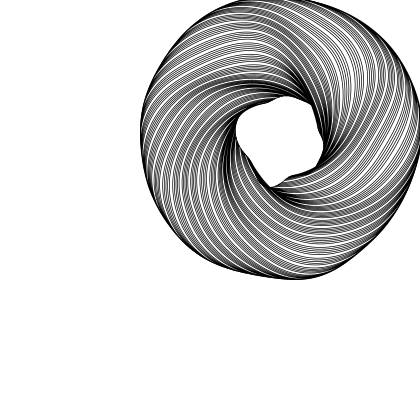

In [250]:
loop(irad=60, noise_ri=1, noise_ro=1, noise_coeff=20)

0


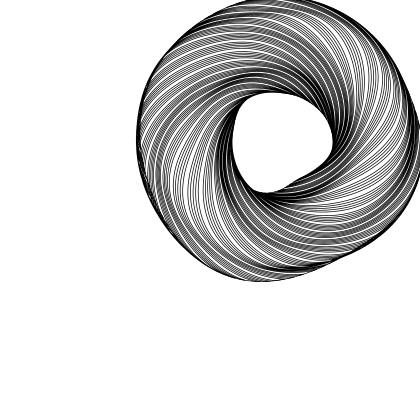

In [251]:
loop(irad=70, noise_ri=1, noise_ro=1, noise_coeff=20,boost=-1)

0


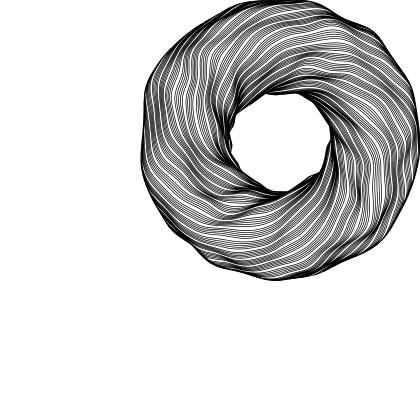

In [252]:
loop(n=180, irad=70, noise_ri=2, noise_ro=3, noise_coeff=10, reverse=True, lap=False)

0


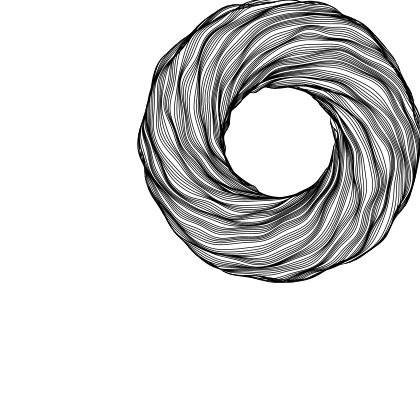

In [253]:
loop(n=168, irad=80, noise_ri=4, noise_ro=3, noise_coeff=10, reverse=True, lap=False)

0


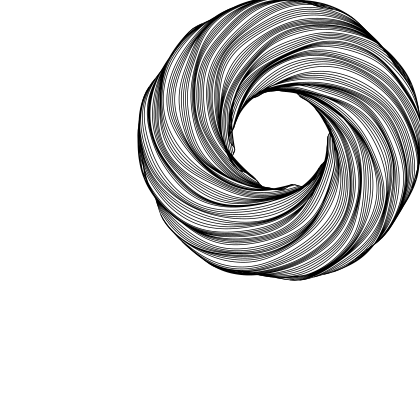

In [254]:
loop(n=180, irad=70, noise_ri=4, noise_ro=1.5, noise_coeff=10, reverse=True, lap=False)

0


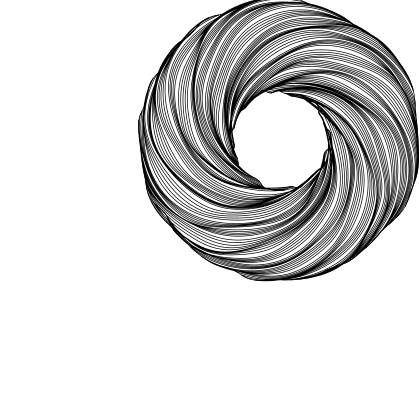

In [255]:
loop(n=180, irad=70, noise_ri=4, noise_ro=1.5, boost=1,noise_coeff=10, reverse=True, lap=False)

0


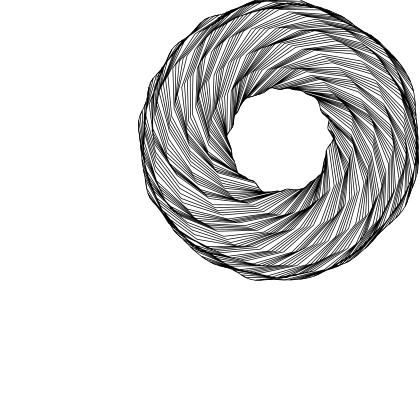

In [256]:
loop(res=7, n=180, irad=60, noise_ri=4, noise_ro=1.5, boost=1,noise_coeff=10, reverse=True, lap=False)

0


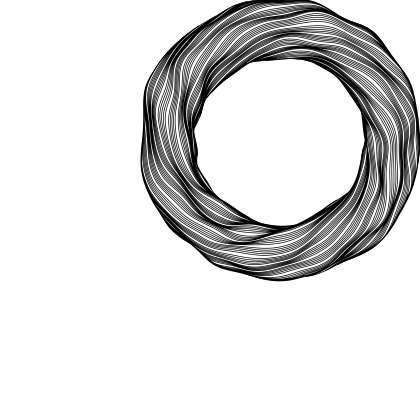

In [257]:
loop(n=132, irad=120, noise_ri=1.9, noise_ro=3, noise_coeff=10, reverse=True, lap=False)

0


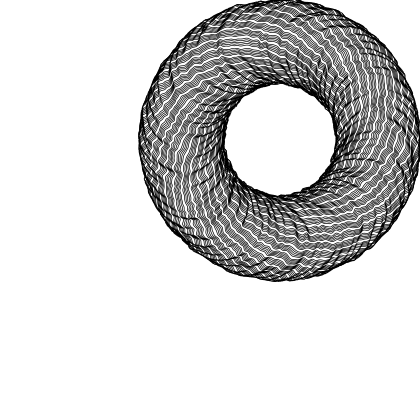

In [258]:
loop(noise_ri=2, noise_ro=20, noise_coeff=5, res=300,lap=False)

0


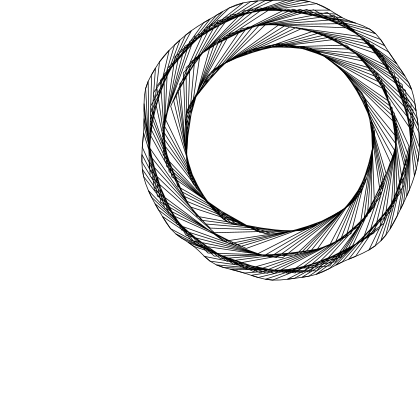

In [259]:
loop(n=120, irad=120, noise_ri=2, noise_ro=3, noise_coeff=10, reverse=True, res=4, lap=False)

0


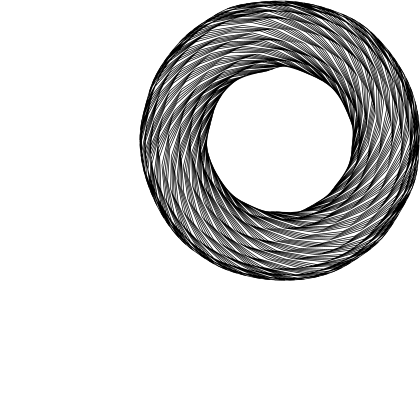

In [260]:
loop(irad=100,noise_ri=2, noise_ro=2.5, noise_coeff=5, lap=False, res=10)

0


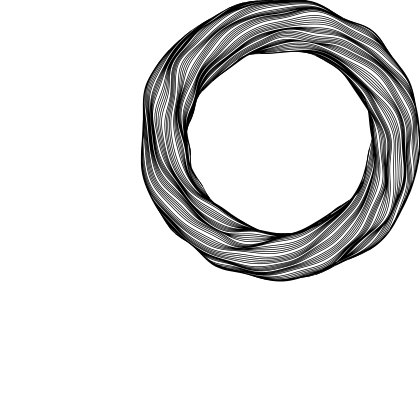

In [261]:
loop(n=120, irad=130, noise_ri=2, noise_ro=3, noise_coeff=10, reverse=True, lap=False)

0


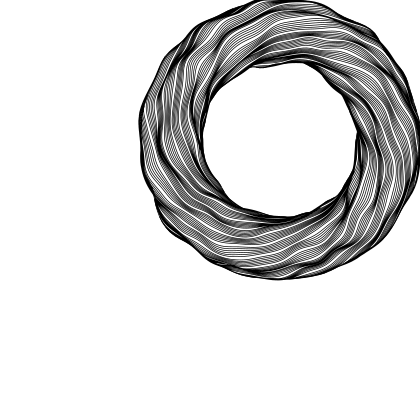

In [264]:
loop(n=147, irad=110, noise_ri=2.4, noise_ro=3.6, noise_coeff=10, reverse=True, lap=False, skipfunc=lambda x: x % 7 == 0)

0


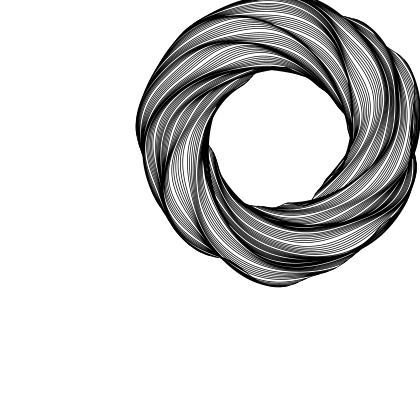

In [265]:
loop(irad=100, n=196, noise_ri=1.7, noise_ro=1.3, boost=1, noise_coeff=20, skipfunc=lambda x: x%7 == 0)

0


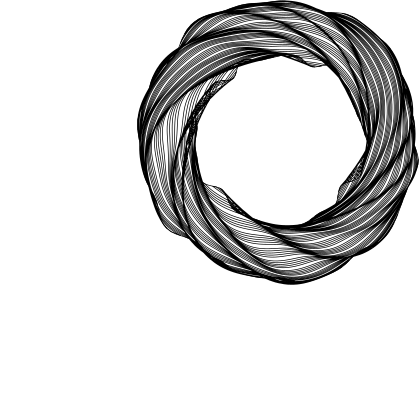

In [266]:
loop(irad=120, noise_ri=1, noise_ro=2, boost=1, noise_coeff=20)

0


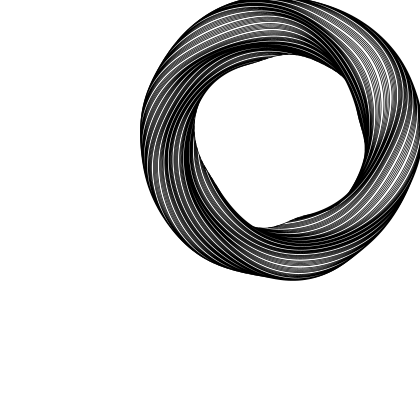

In [267]:
loop(irad=120, noise_ri=1, noise_ro=1, boost=0, noise_coeff=20)

0


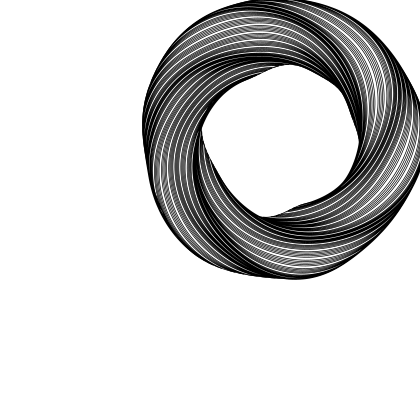

In [268]:
loop(irad=105, n=192, noise_ri=1.2, noise_ro=.8, boost=0, noise_coeff=20)